In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
train = pd.read_csv("D:/Machine Learning/kaggle_house_price_prediction/train.csv")
test = pd.read_csv("D:/Machine Learning/kaggle_house_price_prediction/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.shape[0],train.shape[1])
print(test.shape[0],test.shape[1])

1460 81
1459 80


### Exploring the dataset ###

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Let's check if the data set has any missing values.

In [6]:
#check missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
#missing value counts in each of these columns
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

The variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence.

In [8]:
#visualising missing values
missing = pd.DataFrame(data = missing)
missing.columns = ['count']
missing.index.names = ['Name']
missing['Name'] = missing.index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrType'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtQual'),
  Text(4, 0, 'BsmtCond'),
  Text(5, 0, 'BsmtFinType1'),
  Text(6, 0, 'BsmtExposure'),
  Text(7, 0, 'BsmtFinType2'),
  Text(8, 0, 'GarageCond'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageFinish'),
  Text(11, 0, 'GarageType'),
  Text(12, 0, 'GarageYrBlt'),
  Text(13, 0, 'LotFrontage'),
  Text(14, 0, 'FireplaceQu'),
  Text(15, 0, 'Fence'),
  Text(16, 0, 'Alley'),
  Text(17, 0, 'MiscFeature'),
  Text(18, 0, 'PoolQC')])

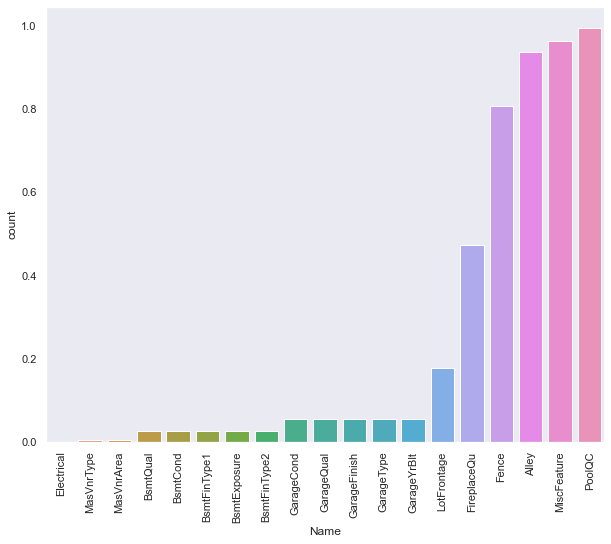

In [9]:
#plot the missing value count
plt.figure(figsize=(10,8))
sns.set(style="dark", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing);
plt.xticks(rotation = 90)

C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

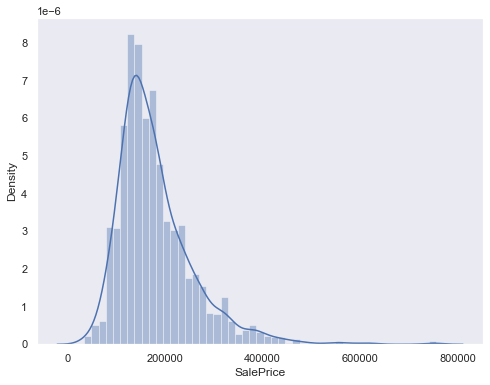

In [10]:
#checking the target distribution
#SalePrice
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'])

In [11]:
#skewness
train['SalePrice'].skew()

1.8828757597682129

It is evident that the target variable 'SalePrice' has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. 

0.12133506220520406


C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

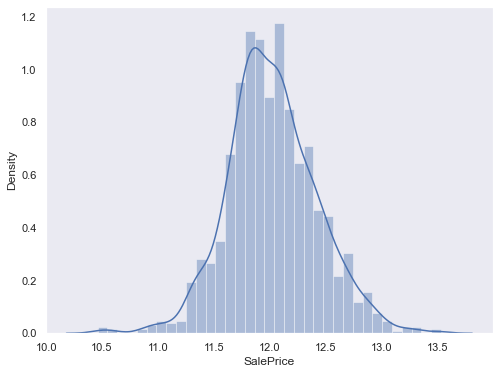

In [12]:
#now transforming the target variable
plt.figure(figsize=(8,6))
target = np.log(train['SalePrice'])
print (target.skew())
sns.distplot(target)

Seperating the numerical and categorical features will help in taking a closer look at them.

In [13]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print(numeric_data.shape[1],cat_data.shape[1])

38 43


Dropping Id variable from numeric data.

In [14]:
numeric_data = numeric_data.drop('Id', axis = 1)
print(numeric_data.shape[1])

37


<AxesSubplot:>

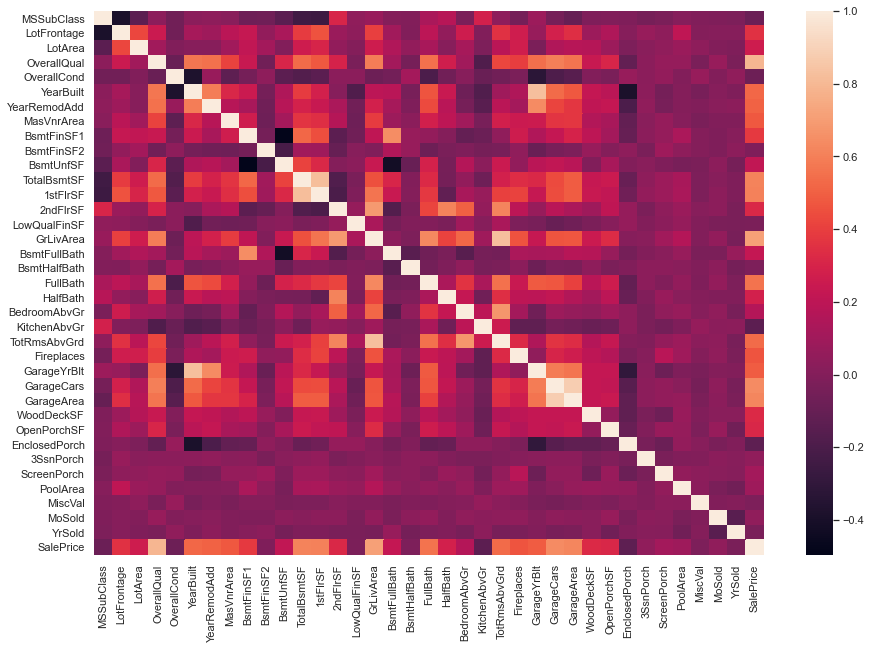

In [15]:
#correlation plot
plt.figure(figsize=(15,10))
corr = numeric_data.corr()
sns.heatmap(corr)

In [16]:
 #top 15 values
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print ('----------------------')
#last 5 values`
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. In addition, GrLivArea is 70% correlated with the target variable. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.
Let's check the OverallQual variable in detail.

In [17]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [18]:
#let's check the mean price per quality and plot it.
train.groupby(['OverallQual']).mean()['SalePrice']

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Mean price per quality')

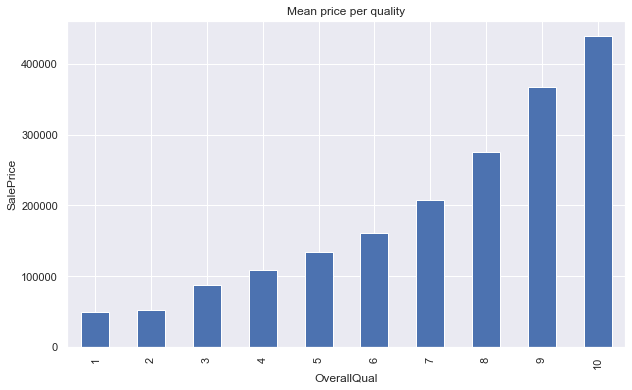

In [19]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid", color_codes=True)
train.groupby(['OverallQual']).mean()['SalePrice'].plot(kind='bar')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Mean price per quality')

 As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior.

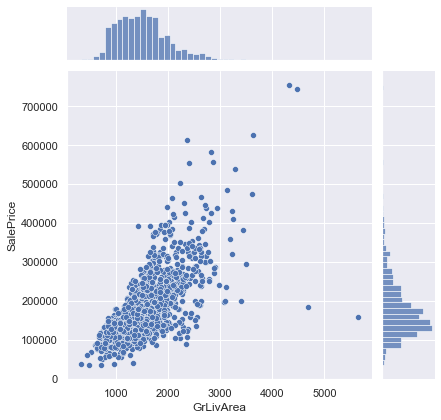

In [20]:
#GrLivArea variable
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

Now, we'll move forward and explore categorical features.

In [21]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


checking the median sale price of a house based on its SaleCondition.

In [22]:
train.groupby(['SaleCondition']).median()['SalePrice']

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Saleprice of a house based on its SaleCondition')

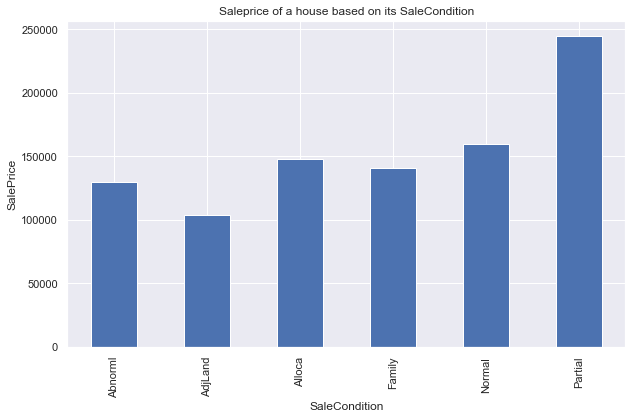

In [23]:
plt.figure(figsize=(10,6))
train.groupby(['SaleCondition']).median()['SalePrice'].plot(kind='bar')
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
plt.title('Saleprice of a house based on its SaleCondition')

SaleCondition Partial has the highest mean sale price. 

C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

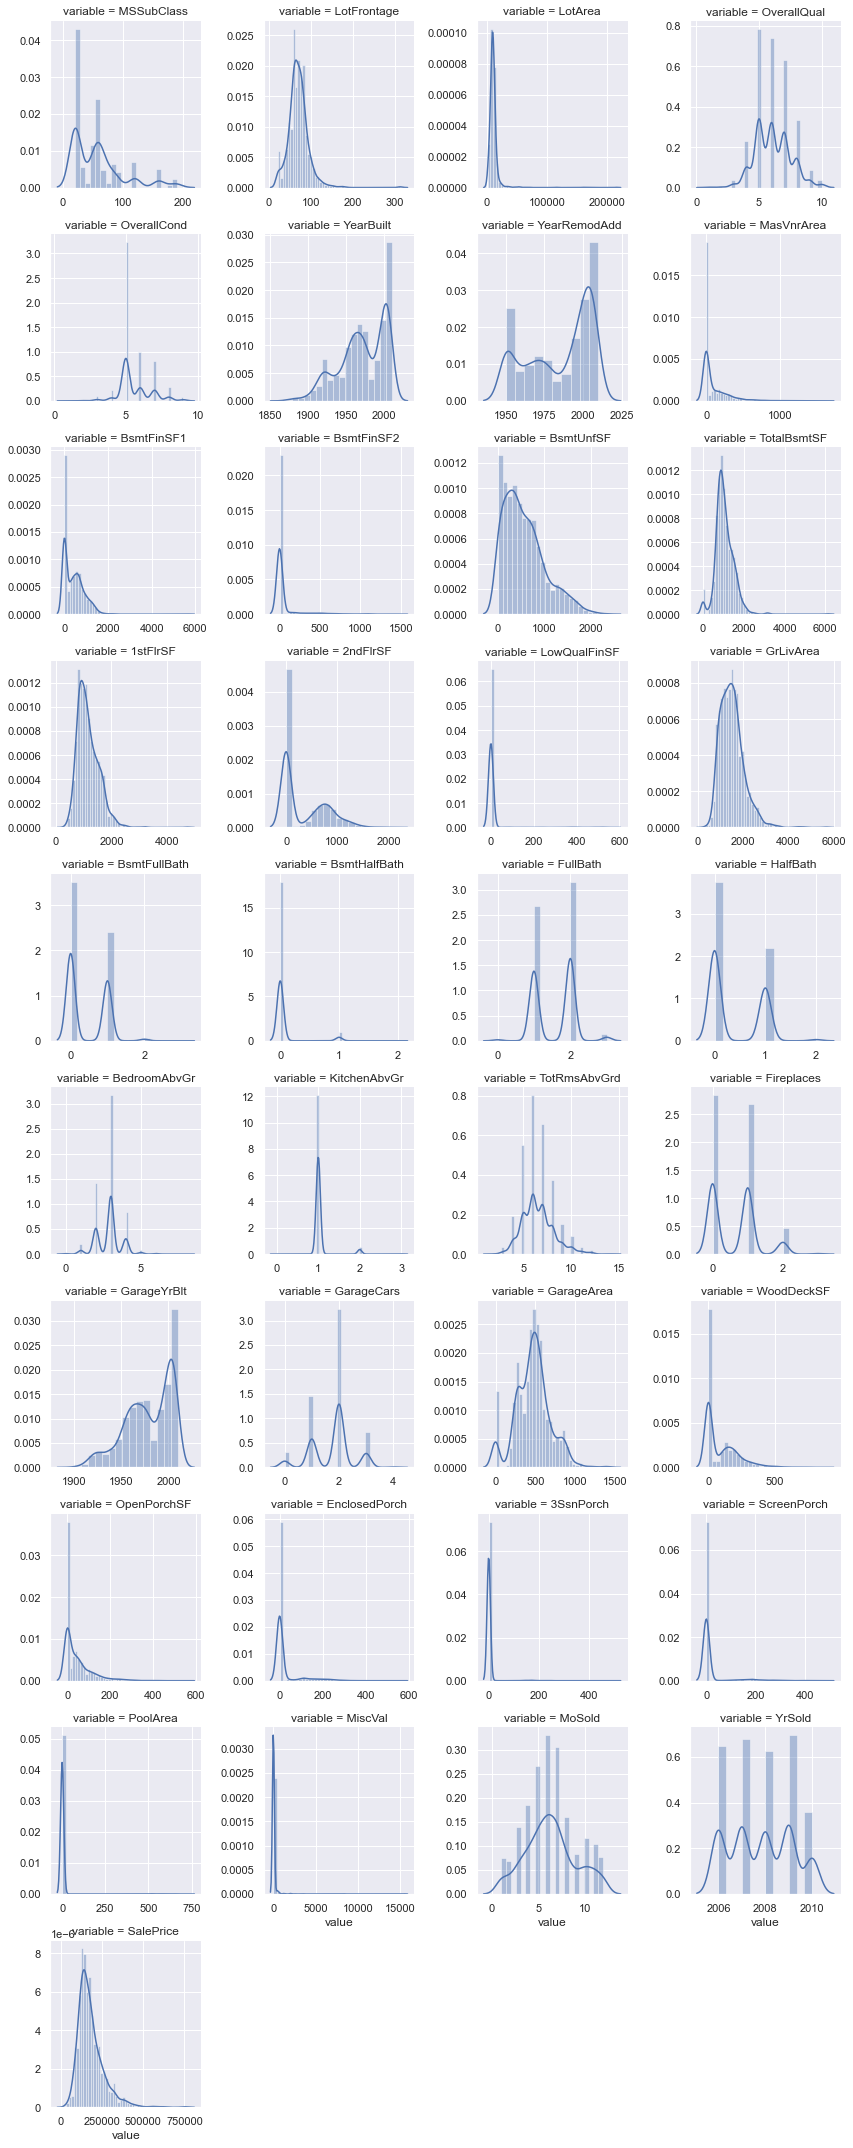

In [24]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

Most of the variables are right skewed. This needs to be transformed at a later stage.

C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


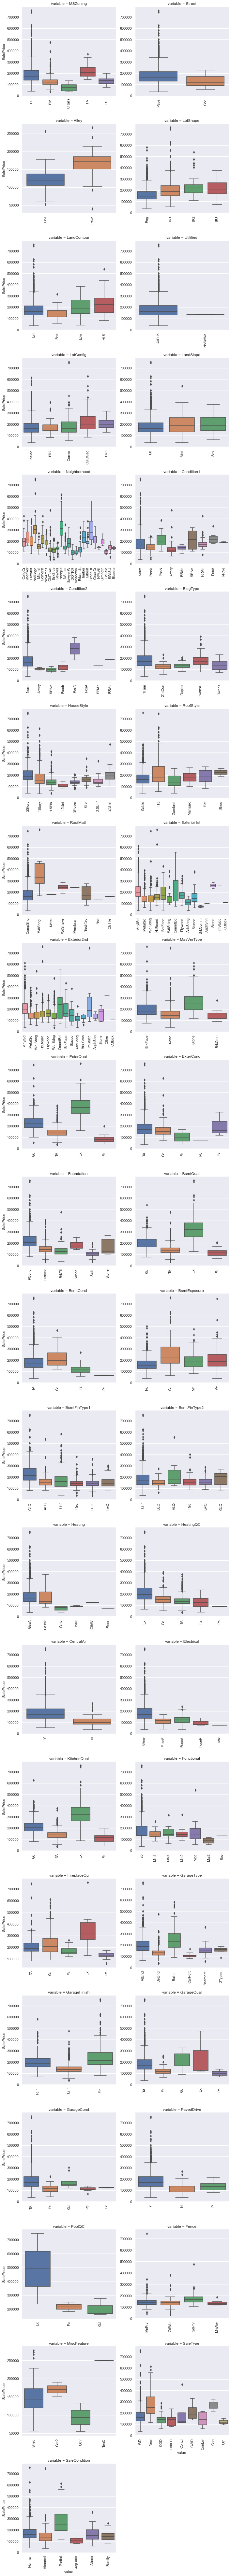

In [27]:
# visualizing numerical_features to identify outliers
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

###  Data Pre-Processing ###

In [28]:
#removing outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape

(1456, 81)

In [29]:
test['GarageQual'].mode()

0    TA
dtype: object